# E7-3 Simple Linear Regression Demo
This example demonstrates supervised machine learning by simple linear regression.

## Step 1: Problem Analysis and Framing

In [99]:
# For data manipulation
import pandas as pd

# for scientific computation
import numpy as np

# for data analysis
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm

# for diagramming 
import matplotlib.pyplot as plt
import seaborn as sns

# For serialization and deserialization of data from/to file
import pickle

## Step 2: Data Preparation

### 2.1 Read data

In [45]:
# read the data
df = pd.read_csv("data/student_scores.csv", sep = ',')

In [46]:
# columns and rows
df.shape

(25, 2)

In [96]:
# get idea of the look
df#.head(10)

,Hours,Scores
0,2.500,21
1,5.100,47
2,3.200,27
3,8.500,75
4,3.500,30
5,1.500,20
6,9.200,88
7,5.500,60
8,8.300,81
9,2.700,25


In [48]:
# see which are the attribute labels
list(df)

['Hours', 'Scores']

In [49]:
# get idea of columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### 2.2 Get Asquainted with the Descriptive Statistics of Data

In [61]:
# get idea of basic statistical parameters for each column
df.describe()

,Hours,Scores
count,25.000,25.000
mean,5.012,51.480
std,2.525,25.287
min,1.100,17.000
25%,2.700,30.000
50%,4.800,47.000
75%,7.400,75.000
max,9.200,95.000


In [62]:
# if you want to change the format, for example to avoid scientific notation, e.g. e+04
pd.set_option('display.float_format', lambda x: '%.3f' % x)

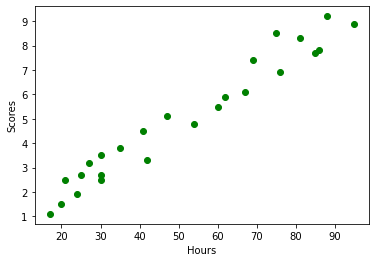

In [75]:
# plot all
plt.ylabel('Scores')
plt.xlabel('Hours')
plt.scatter(df.Scores, df.Hours, color='green')
plt.show()

/home/jorg/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

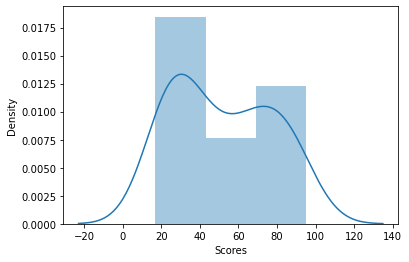

In [76]:
# sns.histplot(df['age'],  label='age')  
sns.distplot(df['Scores'],  label='scores', norm_hist=True)  

/home/jorg/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

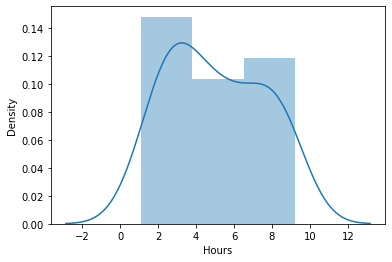

In [77]:
sns.distplot(df['Hours'],  label='hours', norm_hist=True) 

### 2.3 Clean the Data

In [78]:
# to check null values in data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:>

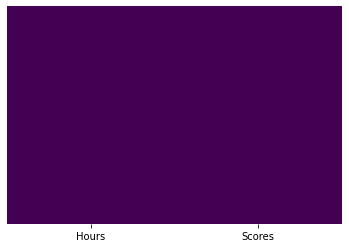

In [79]:
# same visualized
# makes sence if you have null values
sns.heatmap(df.isnull(), yticklabels= False, cbar=False, cmap= 'viridis')

Above representation shows that our data does not have any null values, so no further restoration is needed.

### 2.4 Investigate the Inter-Dependencies of the Features
Create a correlation matrix to see which features determine the output at most, as well as whether there are some correlated features. <br>
If two features are correlated, only one of them can represent both.

In [80]:
corr_matrix = df.corr()
corr_matrix

,Hours,Scores
Hours,1.000,0.976
Scores,0.976,1.000


<AxesSubplot:>

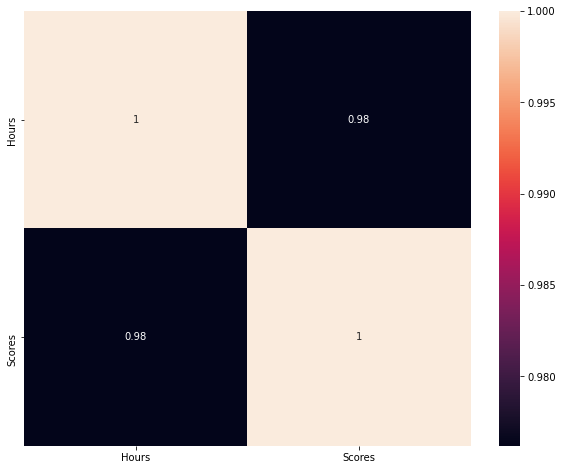

In [81]:
# plot the matrix as a heat map
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot=True)

## Step 3: Train a Model

### 3.1 Method from _LinearRegression_

#### Split the Data in Dependent y and Independent X Data Sets

In [135]:
X = df['Hours'].values.reshape(-1, 1)
y = df['Scores'].values.reshape(-1, 1)

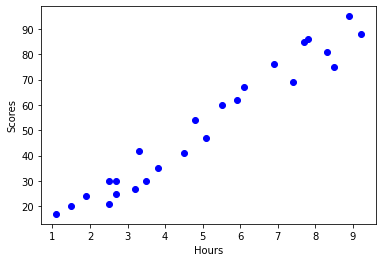

In [136]:
# plot all
plt.ylabel('Scores')
plt.xlabel('Hours')
plt.scatter(X, y, color='blue')
plt.show()

#### Split the Data in Training and Testing Sets

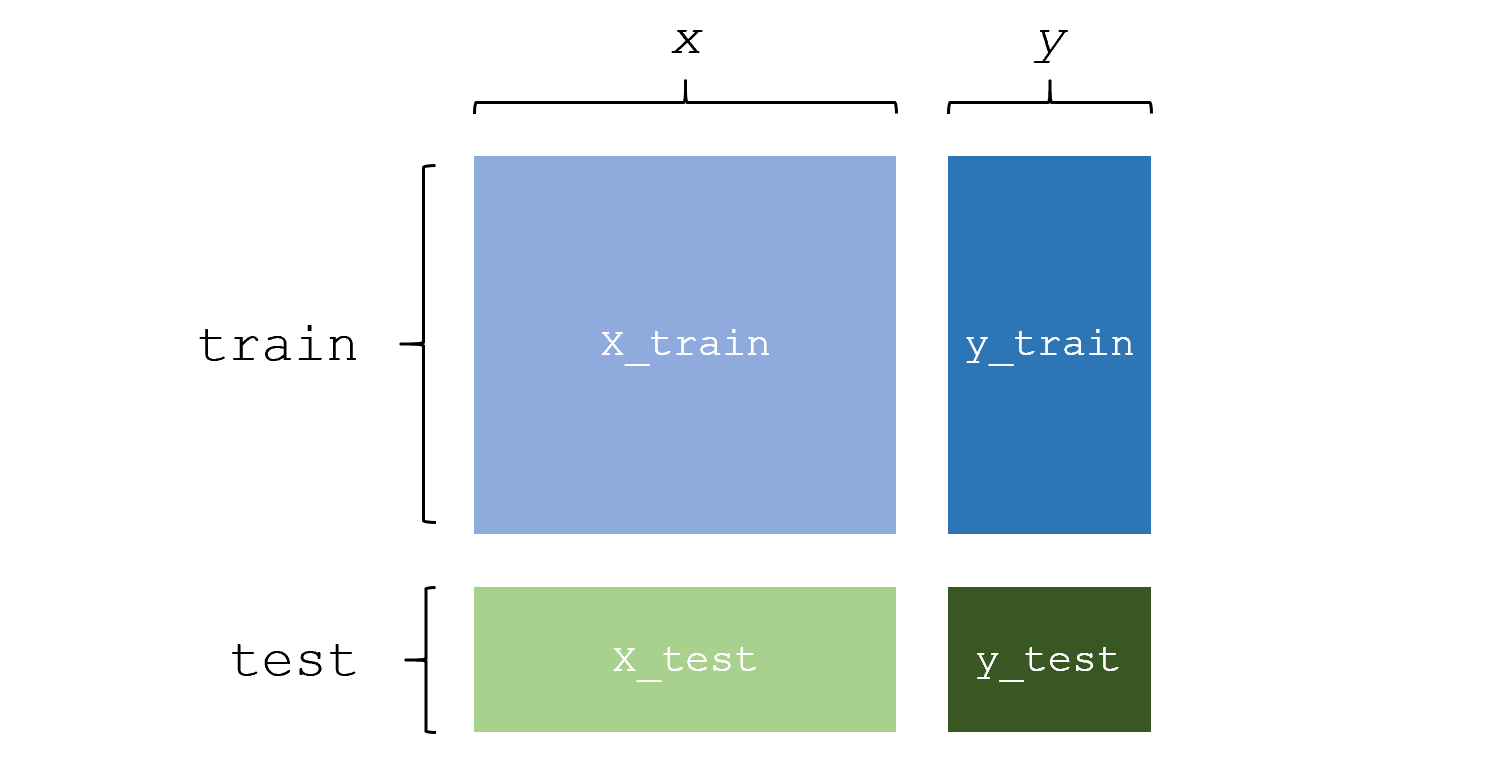

In [137]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2) 

In [138]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20, 1)
(5, 1)
(5, 1)


In [139]:
# creating an instance of Linear Regression model
myreg = LinearRegression()

In [140]:
# fit it to our data
myreg.fit(X_train, y_train)
myreg

LinearRegression()

In [141]:
# get the calculated coefficients
a = myreg.coef_
b = myreg.intercept_

In [142]:
a

array([[10.46110829]])

In [143]:
b

array([-1.53695733])

In [144]:
y_predicted = myreg.predict(X_test)

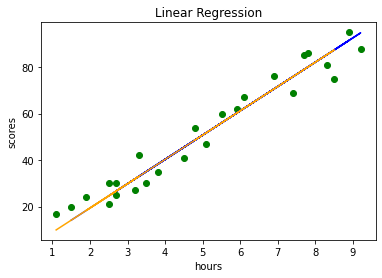

In [145]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

In [146]:
R2 = myreg.score(X, y)
R2

0.9477059220582453

### 3.1 Method _polyfit_ from _numpy_

#### Split the Data in Dependent y and Independent X Data Sets

In [152]:
# Split X and y
X, y = df.Hours, df.Scores

#### Split the Data in Training and Testing Sets

In [153]:
# split the set into subsets for training and testing
from sklearn.model_selection import train_test_split

# default proportion is 75:25
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2) 

In [154]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20,)
(20,)
(5,)
(5,)


In [155]:
# randomly selected
y_train

10    85
18    67
19    69
4     30
2     27
20    30
6     88
7     60
22    35
1     47
16    30
0     21
15    95
24    86
23    76
9     25
8     81
12    41
11    62
5     20
Name: Scores, dtype: int64

#### Train a Model

In [156]:
# build a model from the train data with method 'polyfit'
model = np.polyfit(X_train, y_train, 1)

In [157]:
# get the result of fitting the regression line on the train data
model

array([10.46110829, -1.53695733])

In [158]:
a, b = model[0], model[1]

In [159]:
# build the model from the test data
test = np.polyfit(X_test, y_test, 1)
test

array([ 7.85998595, 11.58885507])

In [160]:
a1, b1 = test[0], test[1]

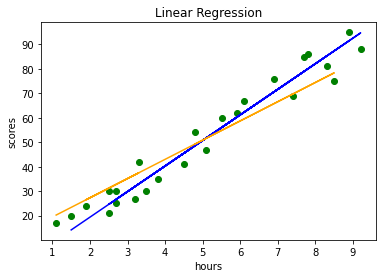

In [162]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, a1*X_test + b1, color='orange')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

We observe some differences between the two models.

## Step 4: Test the Models

### 4.1 Test with Known Data

In [163]:
age_predicted = myreg.predict([[137]])
age_predicted

array([[1431.63487889]])

In [169]:
age_predict = a*137 + b
age_predict

1431.6348788883852

### 4.2 Predict with Unknown Data

In [170]:
# assume a new fish 
length = 91
age_predicted = myreg.predict([[length]])
age_predicted

array([[950.42389738]])

## Step 5: Model Evaluation 

We need evaluation metrics designed for comparing continuous values.

The **three common evaluation metrics** for regression problems:

- **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

- **Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

- **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [171]:
# MAE
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predicted)
print(mae)

7.882398086270432


In [172]:
# MSE
mse = metrics.mean_squared_error(y_test, y_predicted)
print(mse)

68.88092074277635


In [173]:
# RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
print(rmse)

8.299453038771674


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error
- **MSE** is more popular than MAE, because MSE "punishes" larger errors
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units

### Calculate R-squared

In [ ]:
# Explained variance score: 1 is perfect prediction
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

In [ ]:
# R-squared
from sklearn.metrics import r2_score
#r2_score(y, predict(X))
r2_score(y_test, y_predicted)

This is bad result!

# Step 5: Store the Model

In [176]:
# Store the model in a file
model_file = 'deploy/mypolifit.pkl'

# Save now
with open(model_file, 'wb') as f:
    pickle.dump(model, f)

In [177]:
# To load it later for reuse
with open(model_file, 'rb') as f:
    mymodel = pickle.load(f)

In [178]:
# Test reading from the file
predict = np.poly1d(mymodel)
my_age_prediction = predict(120)
print(my_age_prediction)

1253.7960378975904


## Reference
https://www.kaggle.com/aniketg11/predicting-house-prices-through-regression/notebook <br>
https://www.dataquest.io/blog/understanding-regression-error-metrics/ <br>